First 5 rows:
   InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom  

Shape of dataset: (541909, 8)

Column names: ['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country']

Summary statistics:
        InvoiceNo StockC

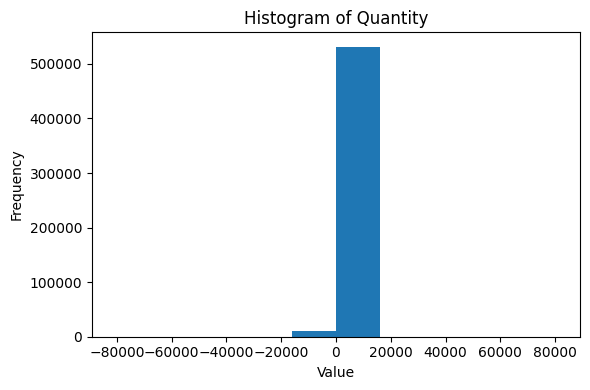

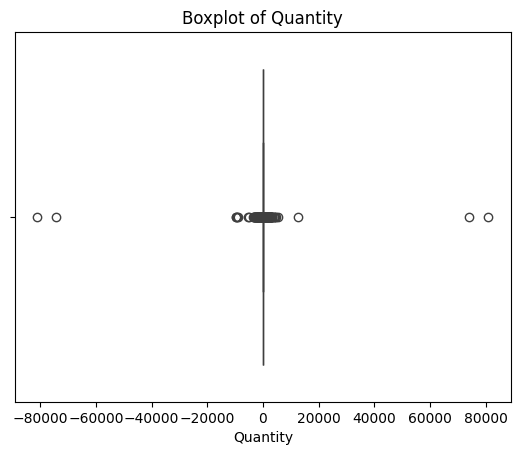

Number of duplicates: 5268
After removing duplicates: (536641, 8)


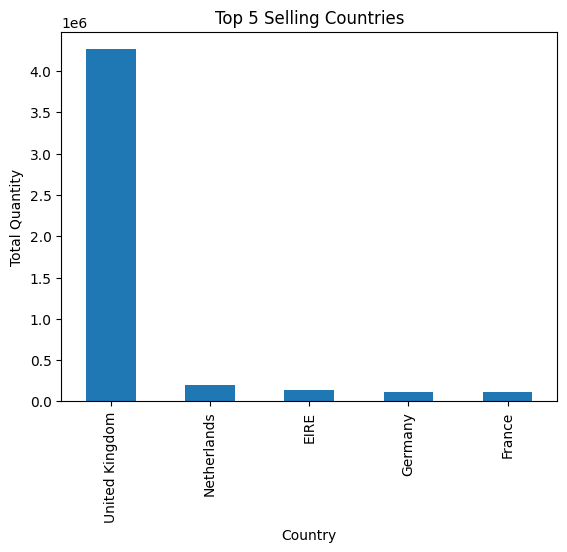

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  

##online retail dataset##
# Load dataset
df = pd.read_csv('data.csv', encoding='latin1')

# Basic Dataset Information
print("First 5 rows:\n", df.head())
print("\nShape of dataset:", df.shape)
print("\nColumn names:", df.columns.tolist())
print("\nSummary statistics:\n", df.describe(include='all'))

df2 = df.drop(['CustomerID'], axis=1)
print(df2.head())

# Min,max,avg price
prices = df['UnitPrice'].dropna().values
print("Min:", np.min(prices))
print("Max:", np.max(prices))
print("Mean:", np.mean(prices))


# Check Missing Values
print("\nMissing values:\n", df.isnull().sum())

# Basic NumPy operations
numeric_cols = df.select_dtypes(include=[np.number]).columns

if len(numeric_cols) > 0:
    col = numeric_cols[0]
    arr = df[col].dropna().values

    print(f"\nNumPy mean of {col}:", np.mean(arr))
    print(f"NumPy median of {col}:", np.median(arr))

#Basic Matplotlib Visualization
plt.figure(figsize=(6,4))
df[col].plot(kind='hist')
plt.title(f"Histogram of {col}")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

#Seaborn visualization
sns.boxplot(x=df[col])
plt.title(f"Boxplot of {col}")
plt.show()

# Count duplicate rows
print("Number of duplicates:", df.duplicated().sum())

# Remove duplicates
df_clean = df.drop_duplicates()

print("After removing duplicates:", df_clean.shape)

top_countries = df.groupby('Country')['Quantity'].sum().sort_values(ascending=False).head(5)
top_countries.plot(kind='bar')
plt.title("Top 5 Selling Countries")
plt.xlabel("Country")
plt.ylabel("Total Quantity")
plt.show()

